## Clase 4

In [4]:
library(ggplot2)

In [6]:
resistencia <- c(
    15.29, 15.89, 16.02, 16.56, 15.46, 16.91, 16.99, 17.27, 16.85, 16.35, 
    17.23, 17.81, 17.74, 18.02, 18.37, 12.07, 12.42, 12.73, 13.02, 12.05, 
    12.92, 13.01, 12.21, 13.49, 14.01, 13.30, 12.82, 12.49, 13.55, 14.53
)

templado <- c( rep( c( "rapido", "lento" ), c( 15, 15 ) ) )
grosor<- rep( c( 8, 16, 24 ), each = 5, times = 2)
datos<- data.frame( templado = templado, grosor = as.factor( grosor ), resistencia = resistencia )
head( datos )

,templado,grosor,resistencia
,<chr>,<fct>,<dbl>
1,rapido,8,15.29
2,rapido,8,15.89
3,rapido,8,16.02
4,rapido,8,16.56
5,rapido,8,15.46
6,rapido,16,16.91


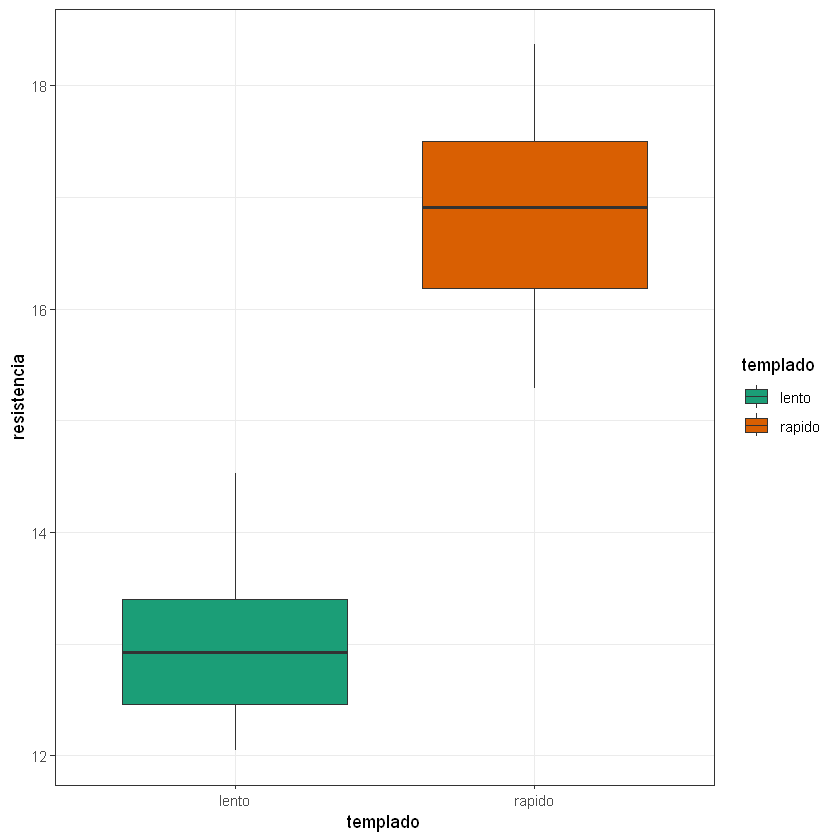

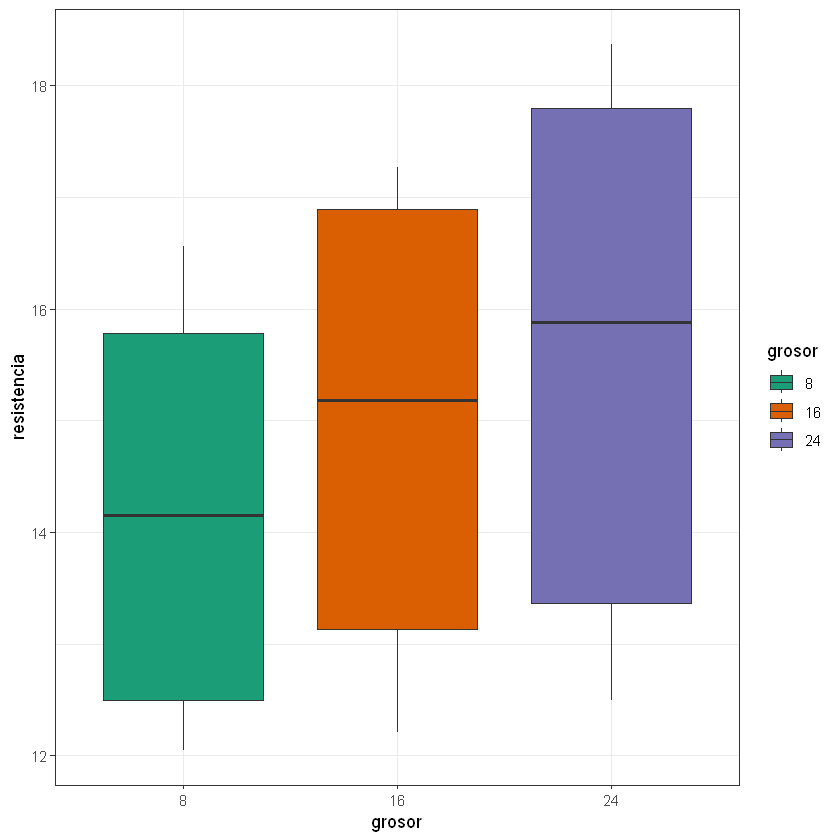

lento   rapido 
12.97467 16.85067

lento    rapido 
0.7113455 0.9276427

8     16     24 
14.151 15.001 15.586

8       16       24 
1.836993 2.036797 2.442354

,8,16,24
lento,12.458,13.128,13.338
rapido,15.844,16.874,17.834


,8,16,24
lento,0.4207969,0.6724730,0.7833709
rapido,0.5000300,0.3341856,0.4171690


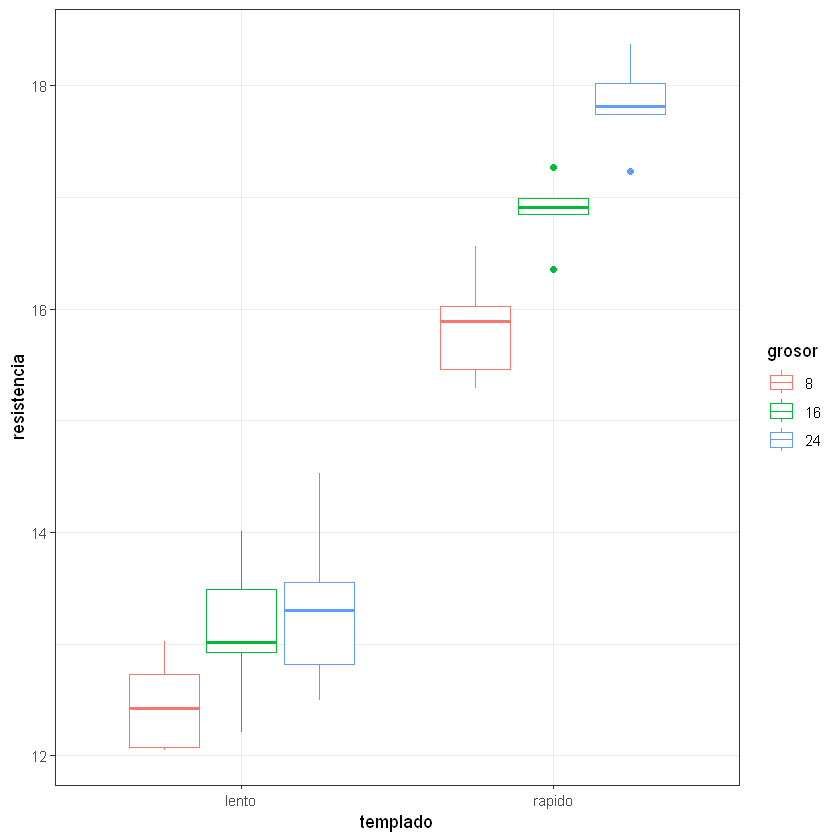

In [17]:
p1 <- ggplot( data = datos, aes( x = templado, y = resistencia, fill = templado ) ) + 
geom_boxplot() +
theme_bw() +
scale_fill_brewer( palette = 'Dark2' )
p1

p2 <- ggplot( data = datos, aes( x = grosor, y = resistencia, fill = grosor ) ) + 
geom_boxplot() + 
theme_bw() +
scale_fill_brewer( palette = 'Dark2' )
p2

p3 <- ggplot( data = datos, aes( x = templado, y = resistencia, colour = grosor ) ) + 
geom_boxplot() +
theme_bw()+
scale_fill_brewer( palette = 'Dark2' )
p3

#grid.arrange( p1, p2, ncol = 2 )
with( data = datos, expr = tapply( resistencia, templado, mean ) )
with( data = datos, expr = tapply( resistencia, templado, sd ) )
with( data = datos, expr = tapply( resistencia, grosor, mean ) )
with( data = datos, expr = tapply( resistencia, grosor, sd ) )
with( data = datos, expr = tapply( resistencia, list( templado, grosor), mean ) )
with( data = datos, expr = tapply( resistencia, list( templado, grosor), sd ) )

## Gráfico de Interacción

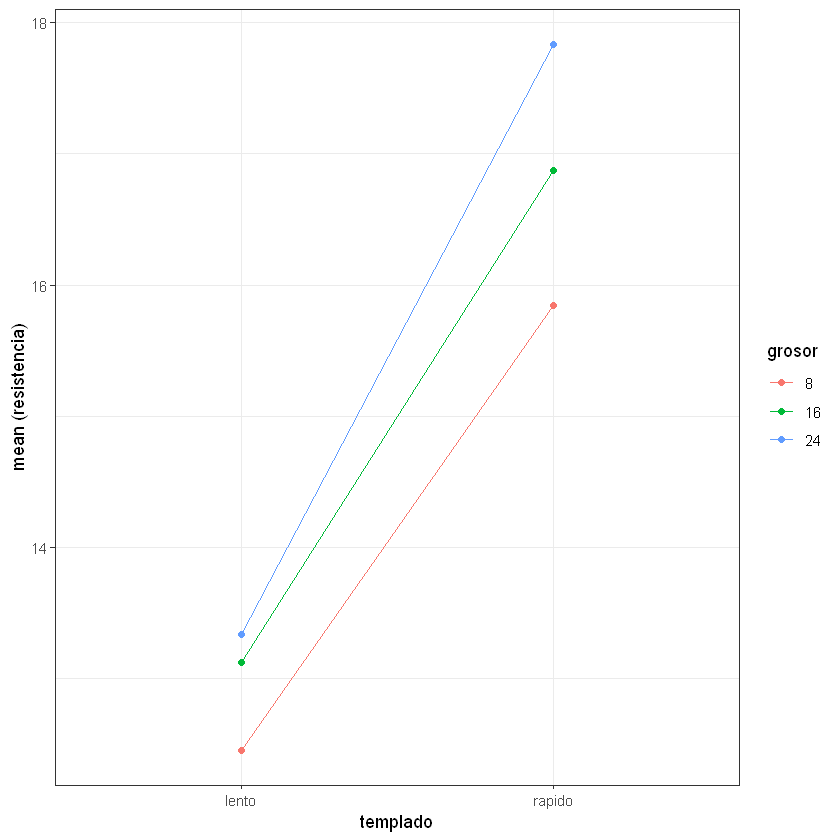

In [8]:
ggplot( data = datos, aes( x = templado, y = resistencia, colour = grosor, group = grosor) ) +
stat_summary( fun = mean, geom = 'point' ) +
stat_summary( fun = mean, geom = 'line' ) +
labs( y =  'mean (resistencia)' ) + 
theme_bw()

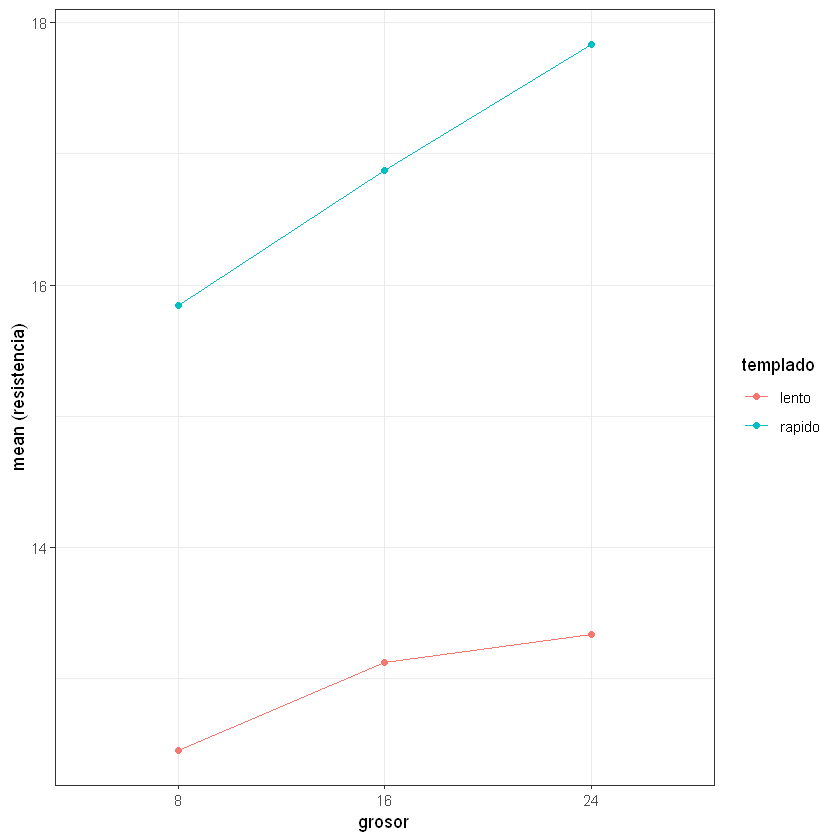

In [10]:
ggplot( data = datos, aes( x = grosor, y = resistencia, colour = templado, group = templado ) ) +
    stat_summary( fun = mean, geom = 'point' ) +
    stat_summary( fun = mean, geom = 'line' ) +
    labs( y = 'mean (resistencia)') +
    theme_bw()

In [18]:
anova <- aov( resistencia ~ templado * grosor, data = datos )
summary( anova )

                Df Sum Sq Mean Sq F value   Pr(>F)    
templado         1 112.68  112.68 380.082 3.19e-16 ***
grosor           2  10.41    5.21  17.563 2.00e-05 ***
templado:grosor  2   1.60    0.80   2.705   0.0873 .  
Residuals       24   7.11    0.30                     
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

## Regresión de Cuantiles

In [19]:
# Generamos una base de datos con varianza no constante

set.seed( 3 ) # fijamos una semilla para replicabilidad
x <- seq( 0, 100, length.out = 150 ) # variable independiente
dst <- 0.2 + 0.1 * x # varianza no constante
b0 <- 5 # intercepto teórico
b1 <- 2 # pendiente teórica
err <- rnorm( 150, mean = 0, sd = dst ) # errores normales
y <- b0 + b1 * x + err # variable dependiente
base <- data.frame( x,y ) # armamos la base de datos

p1 <- ggplot( base, aes( x, y )) + 
    geom_point( color = 'aquamarine3' ) +
    geom_smooth( method = 'lm', level = 0.95 ) + 
    theme_bw() 
# visualizamos

`geom_smooth()` using formula = 'y ~ x'
Smoothing formula not specified. Using: y ~ x
Smoothing formula not specified. Using: y ~ x
Smoothing formula not specified. Using: y ~ x
Smoothing formula not specified. Using: y ~ x
Smoothing formula not specified. Using: y ~ x


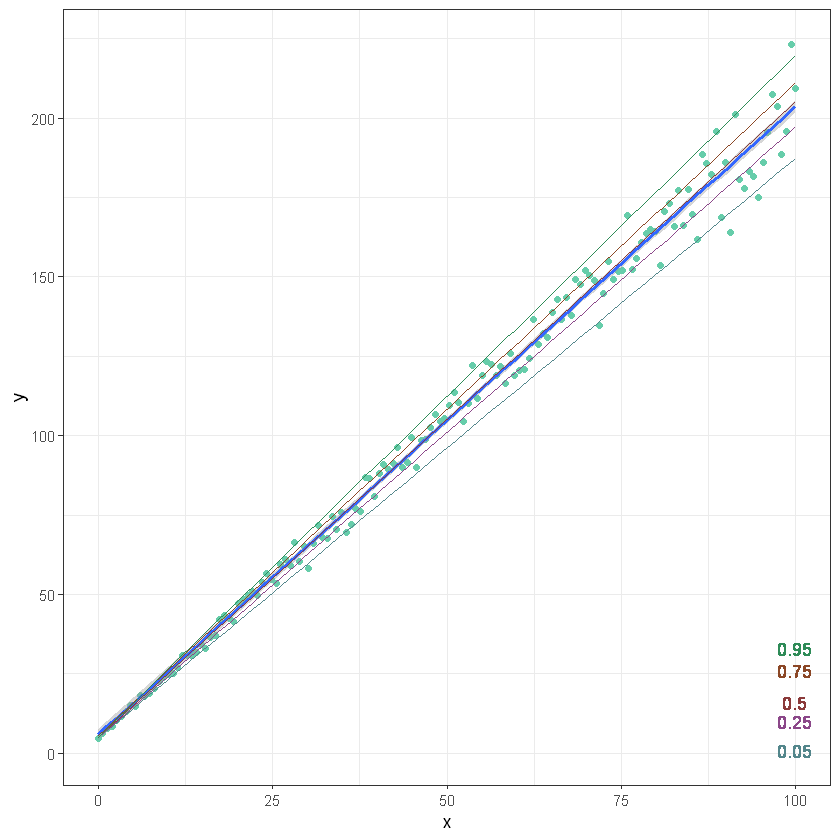

In [23]:
p1 + geom_quantile( quantiles = 0.05, color = 'cadetblue4' ) +
    geom_text( aes( x = 100, y = 1, label = '0.05' ), color = 'cadetblue4' ) +
    geom_quantile( quantiles = 0.25, color = 'orchid4' ) +
    geom_text( aes( x = 100, y = 10, label = '0.25' ), color = 'orchid4' ) +
    geom_quantile( quantiles = 0.50, color = 'indianred4' ) +
    geom_text( aes( x = 100, y = 16, label = '0.5' ), color = 'indianred4' ) +
    geom_quantile( quantiles = 0.75, col = 'sienna4' ) +
    geom_text( aes( x = 100, y = 26, label = '0.75' ), color = 'sienna4') +
    geom_quantile( quantiles = 0.95, color = 'seagreen4' ) +
    geom_text( aes( x = 100, y = 33, label = '0.95' ), color = 'seagreen4' )

## Estimación de los coeficientes de la regresión

In [24]:
library( quantreg )
qs <- seq( 0.1, 0.9, by = 0.1 ) # indicamos los cuantiles que nos interesan
qr2 <- rq( y ~ x, data = base, tau = qs )# estimamos estos cuantiles
coef( qr2 )# pedimos los coeficientes de las rectas estimadas

Loading required package: SparseM


Attaching package: 'SparseM'


The following object is masked from 'package:base':

    backsolve




,tau= 0.1,tau= 0.2,tau= 0.3,tau= 0.4,tau= 0.5,tau= 0.6,tau= 0.7,tau= 0.8,tau= 0.9
(Intercept),4.917353,4.950251,4.965637,5.072489,5.011732,5.017998,5.529391,5.422130,5.203141
x,1.867427,1.910740,1.934776,1.958524,2.001312,2.027460,2.046512,2.069343,2.115957


## Tiempos

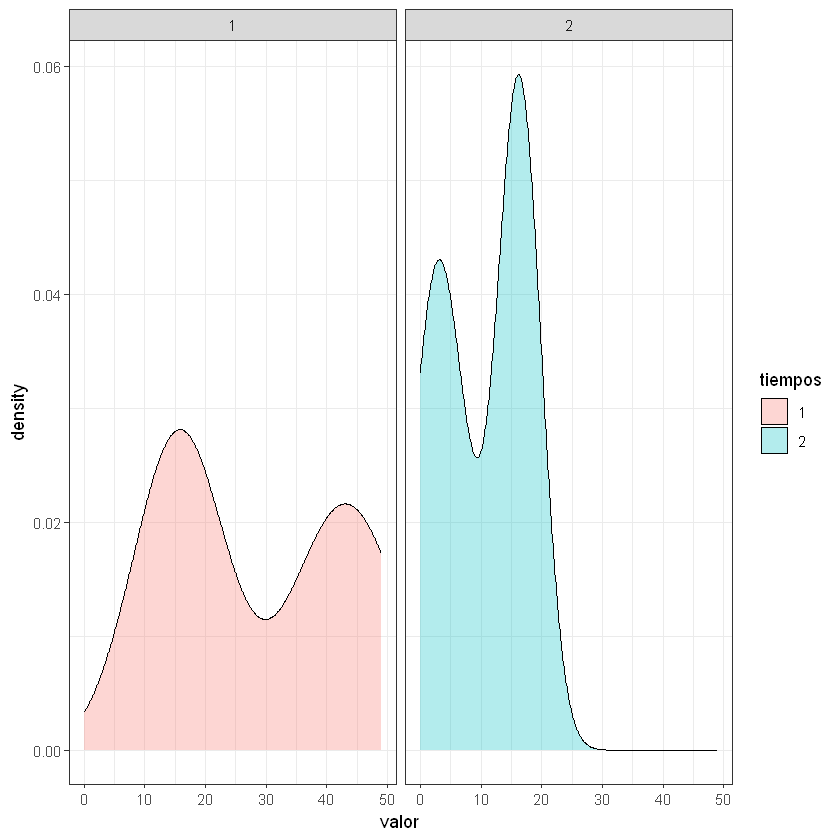

In [30]:
# Cargamos los datos y visualizamos las dos distribuciones
tiempos1 <- c( 15.4, 15.5, 15.6, 15.7, 15.8, 15.9, 16.0, 16.0, 38.3, 39.5, 40.0, 43.0, 45.0, 49.0, 48.0 )
tiempos2 <- c( 0,1.1,2.7, 3.2, 3.3, 5.4, 7.5, 16, 16.1, 16.1, 16.2, 16.3, 16.4, 16.5, 16.6 )
todos <- data.frame( tiempos = c( rep ('1', 15 ), rep( '2', 15 ) ),
valor <- c( tiempos1, tiempos2 ) )

p1 <- ggplot( todos, aes( x = valor, fill = tiempos ) ) +
    geom_density( alpha = 0.3 ) + facet_grid( . ~ tiempos ) +
    theme_bw()
p1

In [31]:
# Calculamos la mediana de cada grupo y luego aplicamos la prueba de Mann Whitney-Wilcoxon
median( tiempos1 )
median( tiempos2 )
wilcox.test( tiempos1, tiempos2 )

[1] 16

[1] 16

Warning message in wilcox.test.default(tiempos1, tiempos2):
"cannot compute exact p-value with ties"



	Wilcoxon rank sum test with continuity correction

data:  tiempos1 and tiempos2
W = 162, p-value = 0.042
alternative hypothesis: true location shift is not equal to 0


In [34]:
# Ajustamos un modelo de regresión para la mediana con la predictora categórica del grupo
mod_q50 <- rq( valor ~ tiempos, tau = 0.5, data = todos )
summary( mod_q50, se = 'boot')


Call: rq(formula = valor ~ tiempos, tau = 0.5, data = todos)

tau: [1] 0.5

Coefficients:
            Value    Std. Error t value  Pr(>|t|)
(Intercept) 16.00000 11.22531    1.42535  0.16511
tiempos2     0.00000 12.62348    0.00000  1.00000